# PINGDINDSHAN'S NUMBER 


## PREIZKUŠANJE FUNKCIJ SAGEA

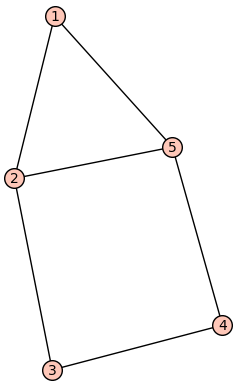

In [2]:
### Koda v Sage-u, ki izriše graf s 5 vozlišči in 6 povezavami

# Uvozim razred Graph iz SageMath-a
G = Graph()

# Dodam 5 vozlišč
G.add_vertices([1, 2, 3, 4, 5])

# Vozliščem dodam povezave
edges = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 1), (2, 5)]
G.add_edges(edges)

# Izrišem graf
G.show()
# dob bibuuerb

## FUNKCIJA PDS

In [3]:
#%%cython
# Hitrejsa razlicica stetja poti - ce ne deluje, odstrani zgornjo vrstico in glej spodaj se v funkciji pds!

from sage.combinat.combination import Combinations
from sage.rings.integer import Integer


def count_paths(G, start, end):
    """
    Presteje poti v neusmerjenem grafu ``G`` od ``start`` do ``end``.

    Koda je povzeta po ``sage.graphs.path_enumeration.all_paths``.
    """
    count_paths = Integer(0)
    act_path = []       # the current path
    act_path_iter = []  # the neighbor/successor-iterators of the current path
    s = start
    while True:
        if s == end:    # if path completes, add to count
            count_paths += Integer(1)
        else:
            if s not in act_path:   # we want vertices just once in a path
                act_path.append(s)  # extend current path
                act_path_iter.append(G.neighbor_iterator(s))  # save the state of the neighbor/successor-iterator of the current vertex
        s = None
        while s is None:
            try:
                s = next(act_path_iter[-1])  # try to get the next neighbor/successor, ...
            except (StopIteration):          # ... if there is none ...
                act_path.pop()               # ... go one step back
                act_path_iter.pop()
            if not act_path:                 # there is no other vertex ...
                return count_paths           # ... so we are done


def pds(G):
    """
    Presteje poti v neusmerjenem grafu ``G``.
    """
    count = G.order()
    for u, v in Combinations(G, 2):
        #count += count_paths(G, u, v) # ce ne deluje s %%cython, zakomentiraj to in odkomentiraj naslednjo vrstico
        count += len(G.all_paths(u, v))
    return count

In [4]:
pds(G)

37

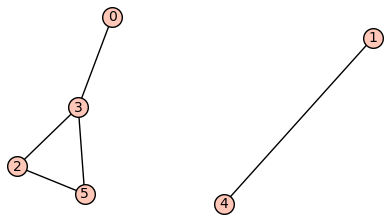

In [5]:
H = graphs.RandomGNM(6,5)
H.show()

## VSI GRAFI

Spodaj je definirana funkcija ustvari_vse_grafe, ki ustvari vse povezane grafe na $1,...,8$ vozliščih. Funkcija vključi vse neizomorfne grafe.

In [6]:
# Funkcija, ki ustvari generatorje za vse grafe na i=1,...,12 vozliščih. Generator pomeni,
# da je v pomnilniku le navodilo za ustvarjanje grafa, ne pa celoten graf. Zaradi tega je 
# program hitrejši in porabi manj prostora na pomnilniku. Funkcija vrne 12 generatorjev,
# vsak naj bi vrnil vse grafe na i vozliščih ( en generator za vsak i)
def gen_vsi_grafi():
    gen_vseh = []
    for i in range(1, 9):
        gen_vseh.append(graphs.nauty_geng(f"{i} -c"))
    return gen_vseh

len(gen_vsi_grafi())
gen_vsi_grafi()

[<generator object GraphGenerators.nauty_geng at 0x7f3ae992a700>,
 <generator object GraphGenerators.nauty_geng at 0x7f3ae992a840>,
 <generator object GraphGenerators.nauty_geng at 0x7f3ae992a980>,
 <generator object GraphGenerators.nauty_geng at 0x7f3ae992aac0>,
 <generator object GraphGenerators.nauty_geng at 0x7f3ae992ac00>,
 <generator object GraphGenerators.nauty_geng at 0x7f3ae992ad40>,
 <generator object GraphGenerators.nauty_geng at 0x7f3ae992ae80>,
 <generator object GraphGenerators.nauty_geng at 0x7f3ae992afc0>]

### FILTRIRANJE GRAFOV IN ISKANJE MAKSIMALNE VREDNOSTI PDS(G)

In [7]:
# funkcija, ki gre skozi vse grafe na 1, ... , 8 vozliščih, izračuna njihov PDS in nato ustvari slovar, kjer so
# ključi števila vozlišč, vrednost pa je največji PDS za vsakega od vozlišč izmed vseh grafov s tem številom vozlišč
def max_pds():
    max_dict = {}
    for grafi in gen_vsi_grafi():
        for G in grafi:
            maks = 0
            if pds(G) == max(maks, pds(G)):
                maks = pds(G)
        max_dict[G.order()] = maks
    return max_dict
    
max_dict = max_pds()



In [8]:
print(max_dict)

{1: 1, 2: 3, 3: 9, 4: 34, 5: 165, 6: 981, 7: 6853, 8: 54804}


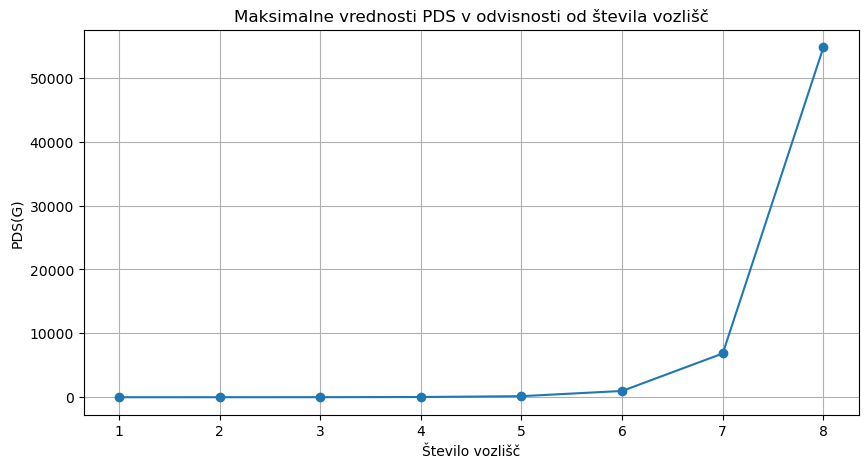

In [9]:
# izrisan graf, ki prikazuje rast PDS v odvisnosti od števila vozlišč
import matplotlib.pyplot as plt

def narisi_graf(dict):
    x = list(dict.keys())
    y = list(dict.values())
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, marker='o')
    plt.xlabel('Število vozlišč')
    plt.ylabel('PDS(G)')
    plt.title('Maksimalne vrednosti PDS v odvisnosti od števila vozlišč')
    plt.grid(True)
    plt.show()

narisi_graf(max_dict)


## DVODELNI GRAFI

In [10]:
pds_dvodelni = {}
def st_poti(seznam_grafov):
    
    for G in seznam_grafov:
        st_vozlisc = len(G.vertices())
        if pds_dvodelni.get(st_vozlisc) is None:
            pds_dvodelni[st_vozlisc] = []
        pds_dvodelni[st_vozlisc] = pds_dvodelni[st_vozlisc].append(pds(G))
    return pds_dvodelni 


## GRAFI BREZ CIKLOV DOLŽINE TRI

Naslednja funkcija iz množice vseh grafov izbere tiste, ki ne vsebujejo trikotnikov oz. cikov dolžine 3. To stori za vse grafe z 1,...,12 vozlišči

In [25]:
def gen_grafi_brez_trikotnikov():
    gen_brez_trik = []
    for i in range(1,9):
        gen_brez_trik.append(graphs.nauty_geng(f"{i} -c -t"))
    return gen_brez_trik

grafi_brez_trikotnikov = gen_grafi_brez_trikotnikov()

Naslednja funkcija med grafi poišče max pds v skupini grafov brez trikotnikov.


In [12]:
def max_pds_trik():
    max_dict_trik = {}
    for grafi in grafi_brez_trikotnikov:
        for G in grafi:
            maks = 0
            if pds(G) == max(maks, pds(G)):
                maks = pds(G)
        max_dict_trik[G.order()] = maks
    return max_dict_trik

max_dict_trik = max_pds_trik()

In [13]:
print(max_dict_trik)

{1: 1, 2: 3, 3: 6, 4: 16, 5: 25, 6: 141, 7: 124, 8: 460}


Za vsak graf brez trikotnikov izračunamo pds. Glede na število poti, naslednja funkcija oblikuje slovar, ki vsakemu številu vozlišč od 1 do 12 pripiše preštete poti na vseh grafih s takim številom vozlišč.


In [26]:
slovar_brez_trikotnikov = {
    1:[], 2:[], 3:[], 4:[], 5:[], 6:[],7:[], 8:[]}

def pds_brez_trikotnikov():
    for gen in grafi_brez_trikotnikov:
        for g in gen:
            if pds(g) == max_dict_trik.get(g.order()):
                slovar_brez_trikotnikov[g.order()]=(g,pds(g))
    return slovar_brez_trikotnikov

pds_brez_trikotnikov= pds_brez_trikotnikov()
pds_brez_trikotnikov

{1: (Graph on 1 vertex, 1),
 2: (Graph on 2 vertices, 3),
 3: (Graph on 3 vertices, 6),
 4: (Graph on 4 vertices, 16),
 5: (Graph on 5 vertices, 25),
 6: (Graph on 6 vertices, 141),
 7: (Graph on 7 vertices, 124),
 8: (Graph on 8 vertices, 460)}

## KUBIČNI GRAFI

Za kubične grafe velja, da imajo vsa vozlišča v takem grafu stopnjo natanko 3 (pravimo jim tudi 3-regularni grafi). Lastnost kubičnih grafov je tudi, da jih lahko dobimo le na sodo mnogo vozliščih. Spodnji funkciji služita generaciji teh grafov na i vozluščih za i=1,...,12 in šteju vseh poti na teh grafih.

In [15]:
def gen_kub_grafi():
    gen_kub_grafi = []
    for i in range(4,9,2):
        gen_kub_grafi.append(graphs.nauty_geng(f"{i} -c -d3 -D3"))
    return gen_kub_grafi

kub_grafi = gen_kub_grafi()
kub_grafi

[<generator object GraphGenerators.nauty_geng at 0x7f3ae9704180>,
 <generator object GraphGenerators.nauty_geng at 0x7f3ae97042c0>,
 <generator object GraphGenerators.nauty_geng at 0x7f3ae9704400>]

In [16]:
# funkcija, ki izračuna maksimalno št. poti
def max_pds_kub():
    max_dict_kub = {}
    for gen in kub_grafi:
        for G in gen:
            maks = 0
            if pds(G) == max(maks, pds(G)):
                maks = pds(G)
        max_dict_kub[G.order()] = maks
    return max_dict_kub

max_dict_kub = max_pds_kub()

In [17]:
print(max_dict_kub)

{4: 34, 6: 135, 8: 446}


In [18]:
slovar_kub_grafi = {
    4:[],6:[],8:[]}

def pds_kub_grafi():
    for gen in kub_grafi:
        for g in gen:
            if pds(g) == max_dict_kub.get(g.order()):
                slovar_kub_grafi[g.order()]=(g,pds(g))
    return slovar_kub_grafi

pds_kub_grafi= pds_kub_grafi()
pds_kub_grafi

{4: [], 6: [], 8: []}

## POVZETEK PRVE TOČKE


V zgornji kodi sva s pomočjo nauty.geng metod poiskala grafe v posameznih družinah, ki imajo na i=1,...,8 vozliščih (za kubične na 4,6,8) največje števlo pds. Da bi dobili boljši občutek kakšni ti grafi zares so, si poglejmo kakšne so moči njihih množic povezav:

In [19]:
def stevilo_povezav(slovar):
    slovar_povezav = {}
    for kljuc in slovar.keys():
        graf,maks = slovar[kljuc]
        slovar_povezav[kljuc]= graf.num_edges()
    return slovar_povezav


        

### VSI GRAFI

### DVODELNI GRAFI

In [20]:
# funkcija, ki pogleda če kateri od dvodelnih grafov na vozliščih 1, ... , 8 doseže največje 
# število PDS in ga doda v slovar
def pds_dvodelni_grafi():
    slovar_dvodelni_grafi = {}
    for gen in gen_vsi_grafi():
        for g in gen:
            if g.is_bipartite() and pds(g) == max_dict.get(g.order()):
                slovar_dvodelni_grafi[g.order()] = (g,pds(g))
    return slovar_dvodelni_grafi

dvodelni = pds_dvodelni_grafi()
dvodelni

# naslednja funkcija pa za vsako število vozlišč 1, ... , 8 izračuna in v slovar shrani maksimalno PDS
# število od dvodelnega grafa s tistim številom vozlišč

def max_pds_dvodelni():
    max_dict_dvodelni = {}
    for grafi in gen_vsi_grafi():
        for G in grafi:
            if G.is_bipartite():
                maks = 0
                if pds(G) == max(maks, pds(G)) and G.is_bipartite():
                    maks = pds(G)
        max_dict_dvodelni[G.order()] = maks
    return max_dict_dvodelni

max_dvodelni = max_pds_dvodelni()

In [21]:
max_dvodelni

{1: 1, 2: 3, 3: 6, 4: 16, 5: 15, 6: 141, 7: 124, 8: 237}

In [22]:
# isto še za kubične grafe
def max_pds_kub():
    max_dict_kub = {}
    for grafi in gen_kub_grafi():
        for G in grafi:
            maks = 0
            if pds(G) == max(maks, pds(G)):
                maks = pds(G)
        max_dict_kub[G.order()] = maks
    return max_dict_kub

max_kub = max_pds_kub()
max_kub

{4: 34, 6: 135, 8: 446}

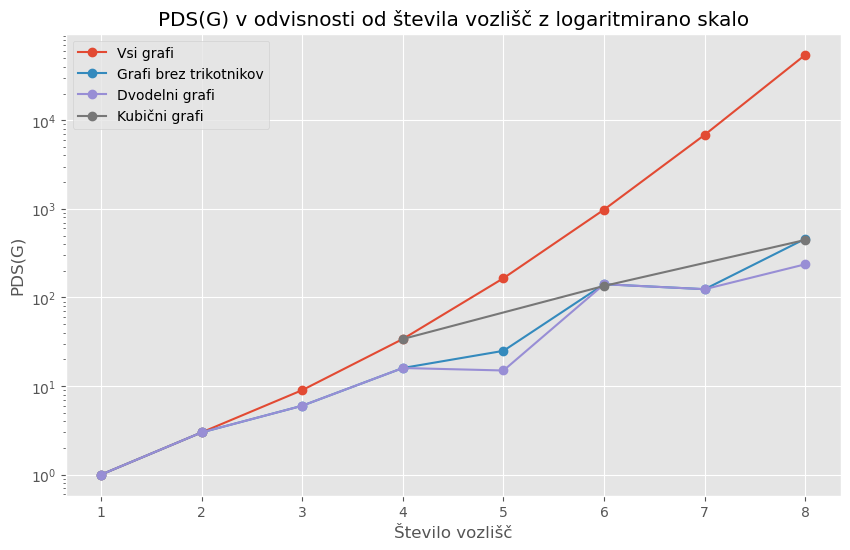

In [23]:
# funkcija za vhodne podatke vzame štiri slovarje, ki vsebuje maksimalno PDS število na vsakem vozlišču
# za vsakega od štirih tipov grafiv, ki sva jih znotraj naloge obravnavala in nato izriše te vrednosti
import matplotlib.pyplot as plt

def plot_multiple_dicts_log_scale(vsi, trik, dvod, kub):
    x_1, y_1 = list(vsi.keys()), list(vsi.values())
    x_2, y_2 = list(trik.keys()), list(trik.values())
    x_3, y_3 = list(dvod.keys()), list(dvod.values())
    x_4, y_4 = list(kub.keys()), list(kub.values())
    
    plt.style.use('ggplot')	

    plt.figure(figsize = (10, 6))
    plt.plot(x_1, y_1, marker='o', label='Vsi grafi')
    plt.plot(x_2, y_2, marker='o', label='Grafi brez trikotnikov')
    plt.plot(x_3, y_3, marker='o', label='Dvodelni grafi')
    plt.plot(x_4, y_4, marker='o', label='Kubični grafi')
    
    plt.xlabel('Število vozlišč')
    plt.ylabel('PDS(G)')
    plt.yscale('log')
    plt.title('PDS(G) v odvisnosti od števila vozlišč z logaritmirano skalo') 
    plt.legend()
    plt.grid(True)
    plt.show()
    

plot_multiple_dicts_log_scale(max_dict, max_dict_trik, max_dvodelni, max_kub)

### GRAFI BREZ TRIKOTNIKOV

In [24]:
stevilo_povezav(pds_brez_trikotnikov)

ValueError: not enough values to unpack (expected 2, got 0)

### KUBIČNI GRAFI

In [ ]:
stevilo_povezav(pds_kub_grafi)

ValueError: not enough values to unpack (expected 2, got 0)

Za kubične grafe velja, da ima vsako vozlišče stopnjo natanko 3. Iz tega sledi, da je število povezav v kubičnem grafu na i vozliščih natanko 3*i/2 povezav. To se ujema z vrednostmi v slovarju, a je v tem primeru pds število neodvisno od števila povezav v grafu?

### STOHASTIČNA ANALIZA

Stohastične analize se bova lotila tako, da bova grafom z maksimalnim pds-jem odstanila naključno povezavo in opazovala kako se mu spreminja pds. Najina predspostavka namreč je, da več kot ima graf povezav, višji bo njegov pds. Iz te predpostavke bi sledilo, da bodo najvišje pds.je imeli polni grafi na i vozliščih.

In [27]:
import random
def odstranitev_povezave(graf):
    if not graf.edges():
        return graf
    else:
        nak_pov = random.choice(list(graf.edges(labels=False)))
        graf.delete_edge(nak_pov)
        if graf.is_connected():
            return graf
        else:
            print("Graf ni več povezan.")


#### VSI GRAFI

#### DVODELNI GRAFI

#### GRAFI BREZ TRIKOTNIKOV 

In [39]:
def nov_pds_trik():
    spremenjeni_grafi = {}
    for kljuc in pds_brez_trikotnikov:
        graf, pds_grafa = pds_brez_trikotnikov[kljuc]
        nov_graf = odstranitev_povezave(graf)
        if nov_graf is not None:
            if isinstance(nov_graf,str):
                spremenjeni_grafi[kljuc]= nov_graf
            else:
                spremenjeni_grafi[kljuc]=(nov_graf, pds(nov_graf))

    return spremenjeni_grafi

nov_pds_trik = nov_pds_trik()

Graf ni več povezan.
Graf ni več povezan.
Graf ni več povezan.


In [40]:
nov_pds_trik

{1: (Graph on 1 vertex, 1),
 2: (Graph on 2 vertices, 2),
 3: (Graph on 3 vertices, 3),
 4: (Graph on 4 vertices, 4),
 5: (Graph on 5 vertices, 5)}

#### KUBIČNI GRAFI

OPOMBA: Če kubičnemu grafu odstanimo eno povezavo, ta NI VEČ kubičen, saj dve vozlišči nimate več stopnje tri.

In [29]:
def nov_pds_kub():
    spremenjeni_grafi = {}
    for kljuc in pds_kub_grafi:
        graf, pds_grafa = pds_kub_grafi[kljuc]
        nov_graf = odstranitev_povezave(graf)
        if nov_graf is not None:
            if isinstance(nov_graf,str):
                spremenjeni_grafi[kljuc]= nov_graf
            else:
                spremenjeni_grafi[kljuc]=(nov_graf, pds(nov_graf))

    return spremenjeni_grafi

nov_pds_kub = nov_pds_kub()

ValueError: not enough values to unpack (expected 2, got 0)

In [ ]:
nov_pds_kub

<function nov_pds_kub at 0x7ff83ecd2ac0>